<font size=6 face=雅黑>1.导入必要的库，并加载数据集</font>

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, log_loss


# 加载数据集
from tensorflow.keras.datasets import fashion_mnist

# 加载Fashion MNIST数据集
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

<font size=6 face=雅黑>2.数据预查看</font>

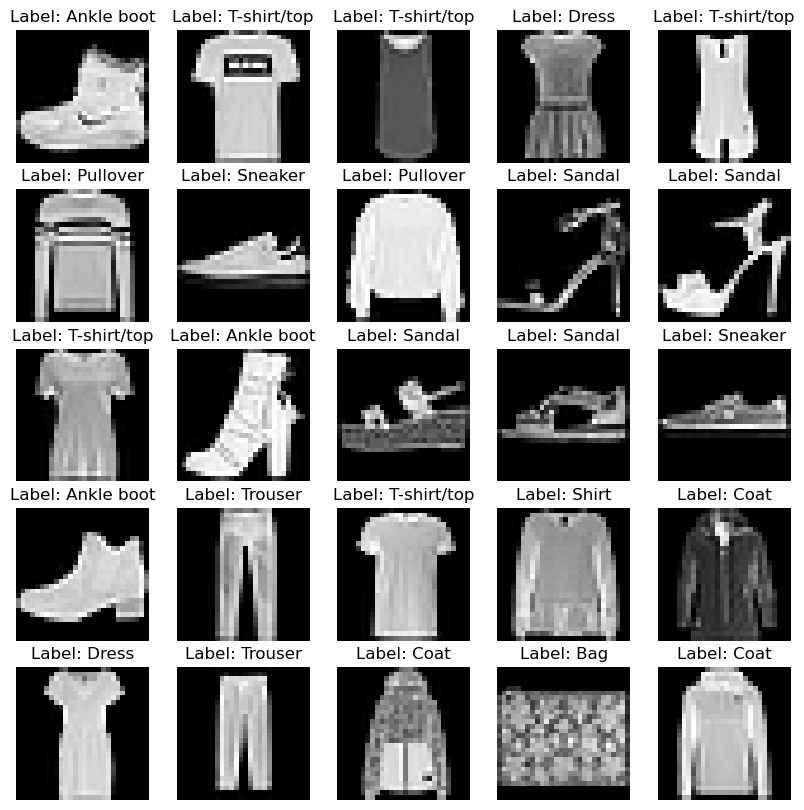

In [4]:
# 标签列表
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 可视化前几个样本图像及其分类标签
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  # 将图像展平后再恢复为原始形状
    plt.title(f"Label: {class_names[y_train[i]]}") 
    plt.axis('off')
plt.show()


<font size=6 face=雅黑>3.数据处理</font>

In [5]:
# 将训练集图像数据reshape为一维数组，并进行归一化处理
X_train = X_train.reshape(-1, 28*28) / 255.0
# 将测试集图像数据reshape为一维数组，并进行归一化处理
X_test = X_test.reshape(-1, 28*28) / 255.0

<font size=6 face=雅黑>4.模型训练</font>

In [7]:
# 创建随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

获取特征重要性

In [13]:
# 获取特征重要性
feature_importance = clf.feature_importances_
# 获取像素数量
num_pixels = X_train.shape[1]

查看训练集和测试集的规模

In [8]:
print("训练集规模:")
print("图像数据:", X_train.shape)
print("标签数据:", y_train.shape)

print("\n测试集规模:")
print("图像数据:", X_test.shape)
print("标签数据:", y_test.shape)


训练集规模:
图像数据: (60000, 784)
标签数据: (60000,)

测试集规模:
图像数据: (10000, 784)
标签数据: (10000,)


<font size=6 face=雅黑>5.模型评估</font>

<font size=5 face=雅黑>分类报告</font>

分类报告提供了每个类别的精确度、召回率和 F1 分数。

In [9]:
# 计算准确率和召回率
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report-Wang Zhiqiang:\n", report)


Accuracy: 0.8764
Classification Report-Wang Zhiqiang:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



 <font size=5 face=雅黑>混淆矩阵</font>

通过混淆矩阵，查看详细的分类结果信息，包括准确分类和错误分类的数量。

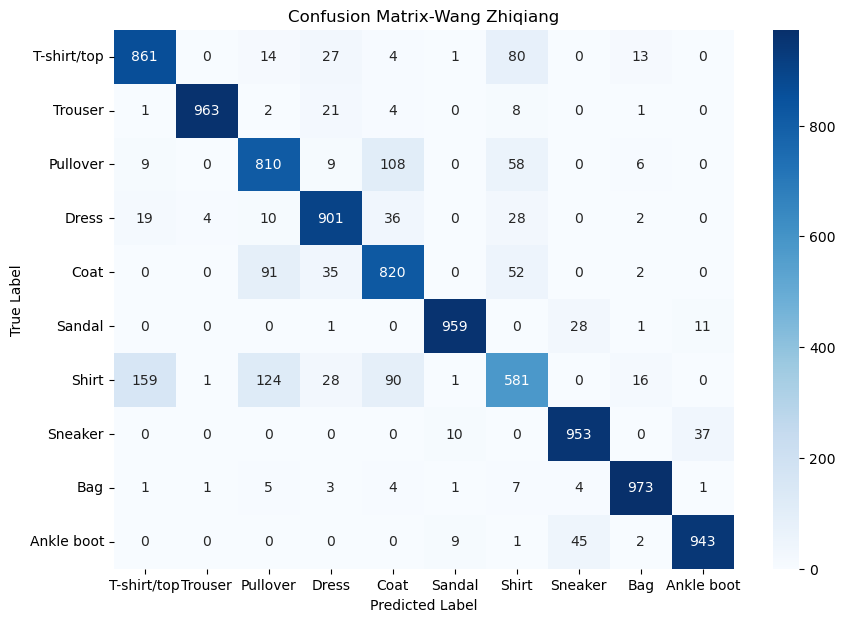

In [10]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 使用 seaborn 绘制混淆矩阵的热力图
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Wang Zhiqiang')
plt.show()

<font size=5 face=雅黑>特征重要性分析</font>

随机森林中，特征重要性是根据每个特征在所有决策树中的节点分裂次数或者节点分裂时的信息增益来计算的.

In [14]:
print("特征重要性数组的长度:", len(feature_importance))
print("像素数量:", num_pixels)


特征重要性数组的长度: 784
像素数量: 784


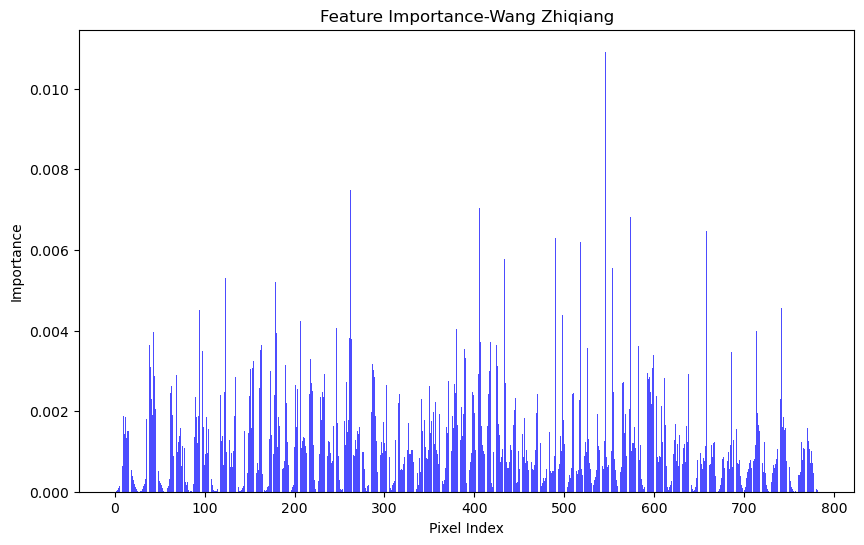

In [15]:
# 创建特征重要性 DataFrame
feature_importance_df = pd.DataFrame({"Feature": range(num_pixels), "Importance": feature_importance})

# 对特征重要性进行排序
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# 绘制特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"], color='blue', alpha=0.7)
plt.xlabel('Pixel Index')
plt.ylabel('Importance')
plt.title('Feature Importance-Wang Zhiqiang')
plt.show()

<font size=6 face=雅黑>6.可视化预测</font>

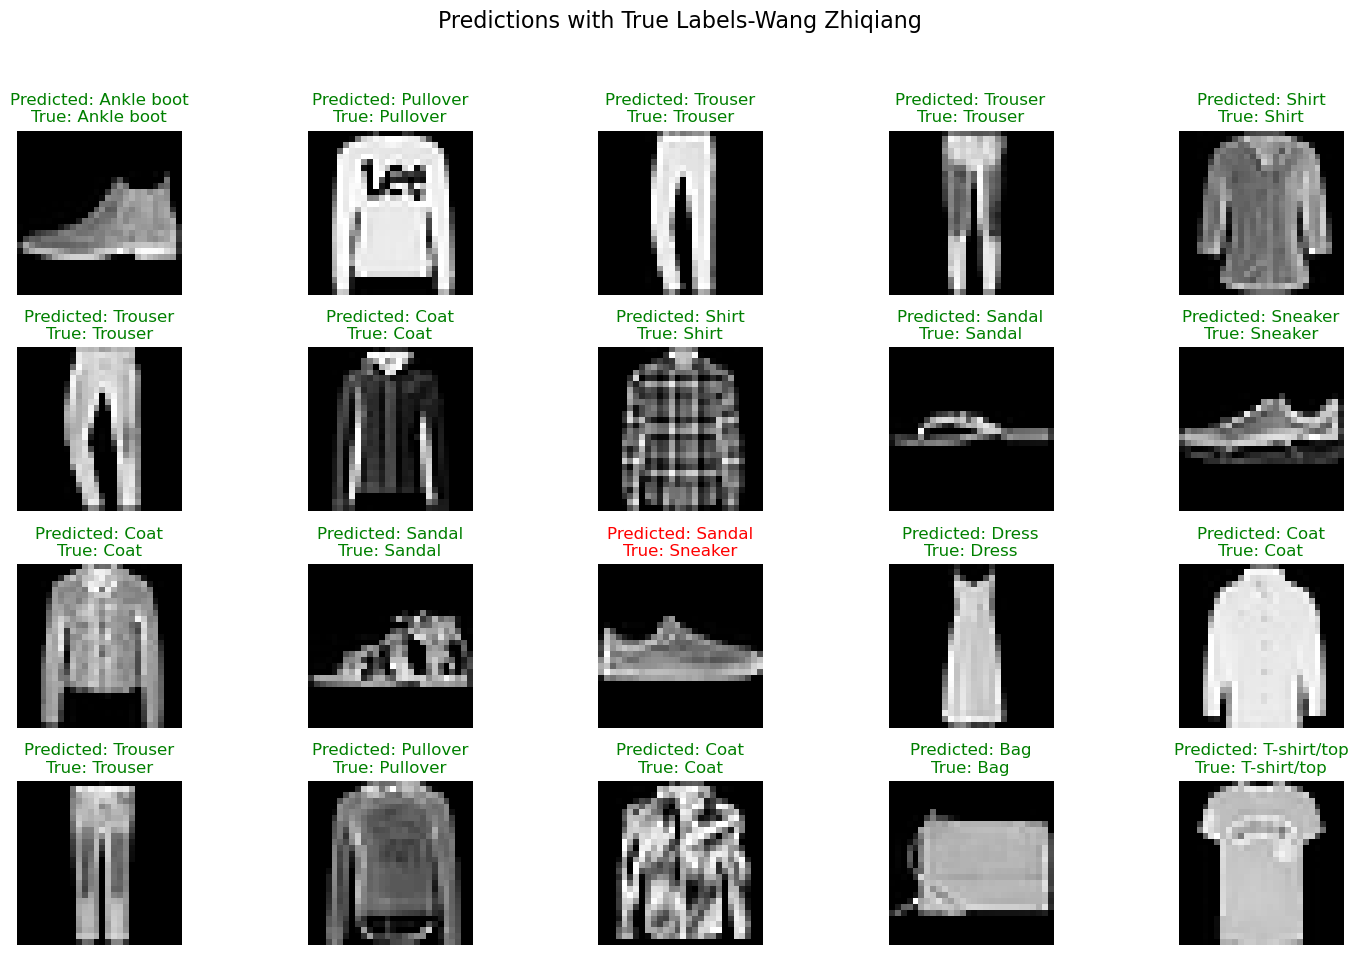

In [16]:
# 打印20张图像并设置带有预测和真实标签的标题
plt.figure(figsize=(15, 10))
plt.suptitle('Predictions with True Labels-Wang Zhiqiang', fontsize=16)  # 添加整个图像的大标题
for i in range(20):
    image = X_test[i].reshape(28, 28)
    predicted_label = class_names[y_pred[i]]
    true_label = class_names[y_test[i]]
    
    # 标题颜色取决于预测结果是否正确
    title_color = 'green' if predicted_label == true_label else 'red'
    
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}", color=title_color)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整子图的布局，以便大标题能够显示
plt.show()
